# Assignment 4

1. 請找出`dcard-top100.csv`中所有的的subject-predicate組合並透過network-x以graph呈現。

- subject-predicate pair: `我 喜歡`，`他 發現`, `你 看到`

- 為了簡化問題，你可以選擇直接使用spacy dependency parser中的`nsubj`token及其head text當作subject-predicate pairs。但你也可以以自己的方式（不一定要用spacy）找出subject-predicate pairs。

- 請以每個subject-predicate pair**出現的次數**當作每個pair的weights，並呈現在一個dataframe中。請只納入**出現2次以上**的pair.
- 最後請利用network-x畫出subject-predicate詞彙網絡：edge由subject指向predicate，而箭頭的粗細則代表一個pair在語料中出現次數(weights)

2. 請利用node2vec找出第一小題中每個predicate node的node vector並作圖呈現。
- 只需要找出你的圖中predicate的node vector即可
- 將所有predicate畫成平面scatter plot (參考範例輸出)

================================

你的output至少需要包含：

1. Subject-predicate-weights dataframe (10%)
2. Subject-predicate graph (40%)
3. Predicate node embedding matrix (10%)
4. Predicate node embedding scatterplot (40%)

In [ ]:
#讓networkx能顯示中文
#跑完這格重啟執行階段即可
!mv SimHei.ttf /usr/local/lib/python3.7/dist-packages/matplotlib//mpl-data/fonts/ttf
!rm -fr ~/.cache/matplotlib

# 1. Subject-predicate graph

In [ ]:
sub_pred_df

,subject,predicate,weights
0,我,想,17
1,我,有,16
2,我,喜歡,16
3,我,知道,15
4,我,看到,12
...,...,...,...
193,我,回覆,2
194,我,決定,2
195,我,租,2
196,我,放縱,2


In [ ]:
#ref: https://stackoverflow.com/questions/52400380/assign-edge-weights-to-a-networkx-graph-using-pandas-dataframe
import matplotlib.pyplot as plt
def plot_graph(G):
    weights = [i['weights']/5 for i in dict(G.edges).values()]
    fig, ax = plt.subplots(figsize=(20,10))
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos, ax = ax, node_color='pink', node_size=400)
    nx.draw_networkx_edges(G, pos, width=weights, ax=ax)
    _ = nx.draw_networkx_labels(G, pos, ax=ax, font_family='SimHei')

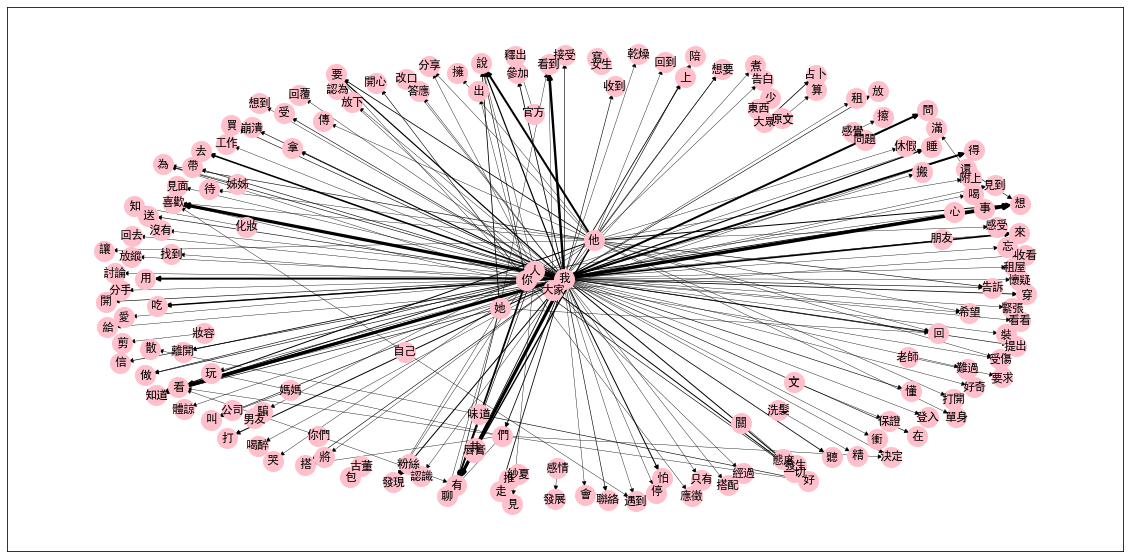

In [ ]:
plot_graph(G)

# 2. Predicate node embeddings

In [ ]:
vec_matrix

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
附上,0.001724,-0.002070,0.005178,0.003706,0.001578,0.001417,-0.003687,0.005961,0.000573,0.005354,-0.002081,0.004159,0.001073,0.001375,0.004079,0.005923,-0.006402,0.005102,-0.002857,-0.003701,0.000041,-0.005664,0.005260,0.005625,0.002625,0.002868,0.006950,-0.006913,0.002067,-0.001782,-0.001941,-0.002720,-0.000152,0.003474,-0.000134,0.005506,0.003418,-0.005863,0.005157,0.006501,0.007684,-0.007823,0.007518,-0.003976,0.002825,0.002745,0.000421,-0.002760,-0.001514,0.000131,-0.006451,-0.006436,-0.001911,0.004024,0.002035,0.001941,-0.002868,0.001594,0.004475,0.007417,0.006975,-0.004562,0.007561,-0.006662
發展,0.000833,-0.011527,-0.011900,-0.004926,-0.010659,-0.008510,-0.007892,-0.009456,-0.008624,0.002132,0.004828,0.004650,0.006593,-0.003531,0.004550,-0.004278,0.010537,0.000947,0.015503,-0.004479,-0.009353,0.003253,0.007944,0.006846,-0.009889,-0.006454,0.004624,0.004611,0.009579,0.012434,0.001940,0.004837,-0.006523,-0.009274,-0.003828,0.008893,-0.009783,-0.001964,0.001300,-0.012915,-0.004669,0.000488,0.006541,-0.006319,-0.008273,0.006380,-0.018382,0.006573,0.002678,-0.010675,-0.006851,0.012445,0.012489,-0.003534,-0.004109,-0.011359,0.013059,0.007696,0.000439,-0.007663,0.012573,0.006132,-0.004398,-0.001963
分手,-0.006946,0.003328,0.006264,0.001461,-0.004267,-0.004538,-0.007224,0.003009,0.005536,0.007757,-0.002958,-0.003790,0.007132,-0.001387,0.005147,0.000842,0.001662,0.005664,-0.005821,-0.002341,-0.007540,-0.001023,-0.005343,-0.001553,0.005908,0.004828,-0.004516,0.006801,-0.000963,-0.004782,0.006046,-0.007669,-0.001058,0.001109,0.002140,-0.007059,0.002959,-0.006424,0.006711,-0.001999,-0.001875,0.005932,-0.004403,-0.002101,0.007409,0.004090,-0.003829,0.004122,-0.000196,0.003032,0.001511,-0.007477,-0.000381,0.006529,0.000550,0.005044,-0.000250,0.004852,-0.000995,-0.006916,-0.004851,0.002275,-0.005434,0.002087
改口,0.002305,-0.006231,0.003680,-0.004385,0.000170,0.005939,0.004494,0.001356,0.006079,-0.002443,0.003448,0.003993,-0.002692,0.001214,-0.007203,-0.002799,-0.000072,0.001493,-0.001255,-0.007693,-0.000778,0.000135,0.003654,0.001316,-0.004269,-0.003095,-0.001373,-0.007014,-0.003018,0.003530,-0.003575,-0.005342,0.006421,0.000011,0.006615,0.005614,0.003430,-0.001055,0.000012,-0.002357,0.007734,0.006463,0.000529,0.005872,0.003550,-0.007470,0.001471,0.003574,0.007403,0.006064,0.003212,0.003191,-0.004154,0.002453,0.007086,-0.000778,-0.007775,0.004074,-0.006296,0.006109,-0.001906,-0.005736,-0.000328,0.006518
分享,-0.001272,-0.006541,-0.007133,0.001050,-0.007596,0.002618,0.003570,-0.004371,0.005217,0.005905,0.003319,-0.003080,0.006055,-0.000545,0.002429,-0.004429,0.006679,-0.005147,-0.004917,0.006492,0.001697,-0.005437,-0.005394,0.003900,0.005655,-0.006174,-0.006100,0.006146,0.007784,-0.000426,-0.006903,0.007474,0.007931,0.003239,-0.000213,0.000590,0.005678,-0.005320,-0.001250,0.006582,-0.006300,-0.001637,-0.006482,-0.000855,0.001212,0.006788,-0.004239,0.001853,-0.006288,0.000715,0.007000,-0.007920,0.000633,-0.000358,0.000657,0.000400,-0.004419,0.008044,-0.003010,-0.003049,-0.004629,0.003738,-0.000408,0.007020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
工作,-0.006661,0.005041,0.000793,-0.004747,-0.003829,-0.003941,0.000135,0.000448,-0.004507,-0.004611,-0.005262,0.001206,-0.006543,0.005234,0.005706,0.003938,0.003888,-0.005591,0.003332,-0.002196,0.001454,-0.005876,-0.007638,0.005015,-0.006371,-0.005356,-0.005136,-0.003225,-0.007236,-0.006427,0.000886,-0.001796,-0.006881,0.000312,-0.006424,0.005811,0.001274,0.003540,-0.000308,0.004867,0.006516,0.005858,-0.000028,-0.007066,0.003541,0.006019,-0.001854,0.003019,0.005808,-0.005923,-0.003108,-0.003747,0.006301,-0.007

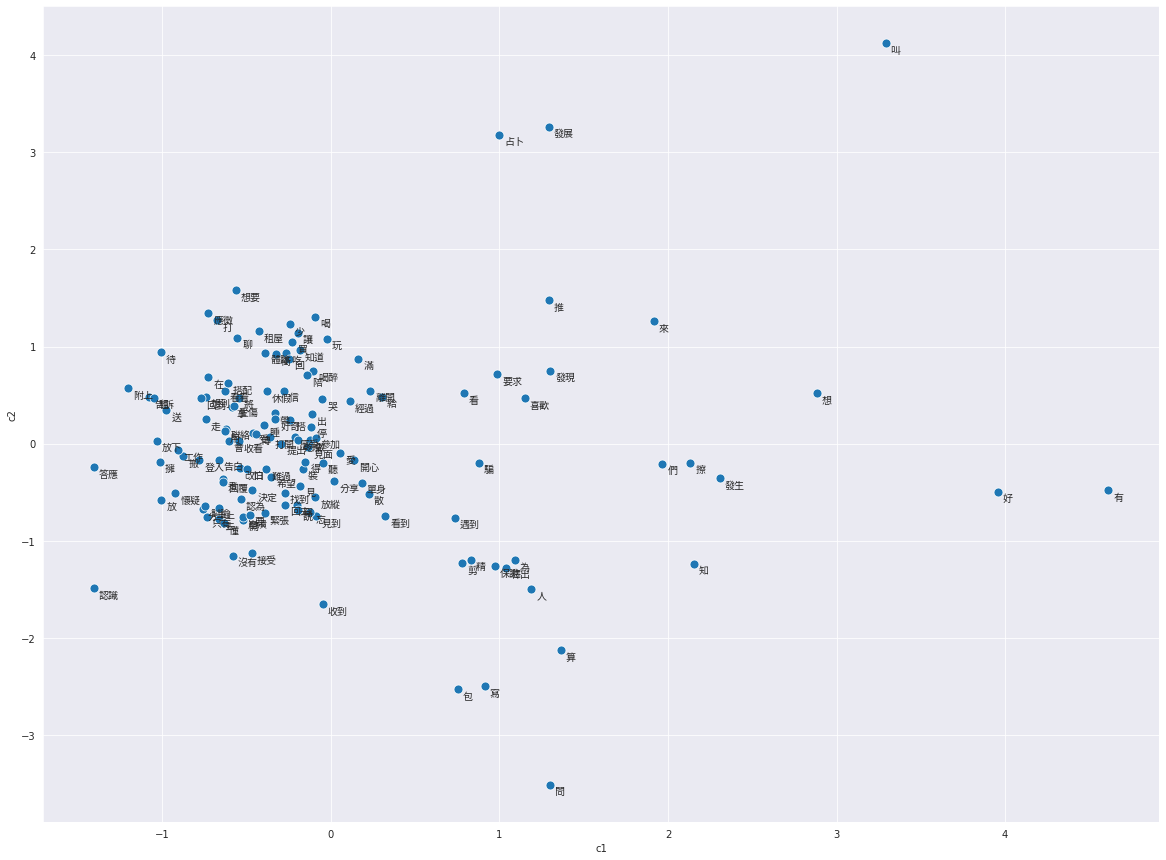

In [ ]:
plot